# 1.单神经元的浅层神经网络

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#用于数据挖掘，数据分析和机器学习的库（内置了哼多人工智能函数）
import sklearn
import sklearn.datasets
import sklearn.linear_model

#提供了工具函数
from planar_utils import *
#提供了单元测试工具函数
from testCases import *

%matplotlib inline

np.random.seed(1)

In [3]:
X, Y = load_planar_dataset()

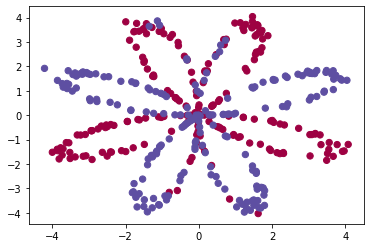

In [4]:
plt.scatter(X[0, :], X[1, :],c=Y.ravel(), s=40, cmap=plt.cm.Spectral)

In [5]:
shape_X = X.shape # 得出X的维度,维度是(2,400)，表示（横纵坐标，样本数）
shape_Y = Y.shape # 得出Y的维度,维度是(1,400)，表示（颜色标签，样本数）
m = Y.shape[1]  # 得出样本数量

In [6]:
print ('X的维度是: ' + str(shape_X))
print ('Y的维度是: ' + str(shape_Y))
print ('训练样本的个数是：' + str(m))

X的维度是: (2, 400)
Y的维度: (1, 400)
训练样本的个数是：400


In [8]:
#生成LogisticRegrassionCV类的一个对象，内部实现类一个单神经元网络
clf = sklearn.linear_model.LogisticRegressionCV()

In [9]:
#传入训练数据，会将训练好的w和b保存在对象clf中
clf.fit(X.T,Y.T.ravel())

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [10]:
#用clf对象对数据集进行预测，简单起见，只用了训练数据集
LR_predictions = clf.predict(X.T)

In [11]:
print ('预测准确度是: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) + '% ')

预测准确度是: 47 % 


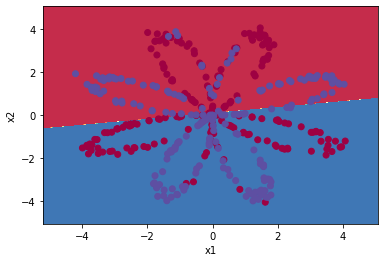

In [12]:
#画出预测结果图
plot_decision_boundary(lambda x: clf.predict(x), X, Y.ravel())

# 2.多神经元的浅层神经网络

## 1.初始化参数

初始化参数w和b

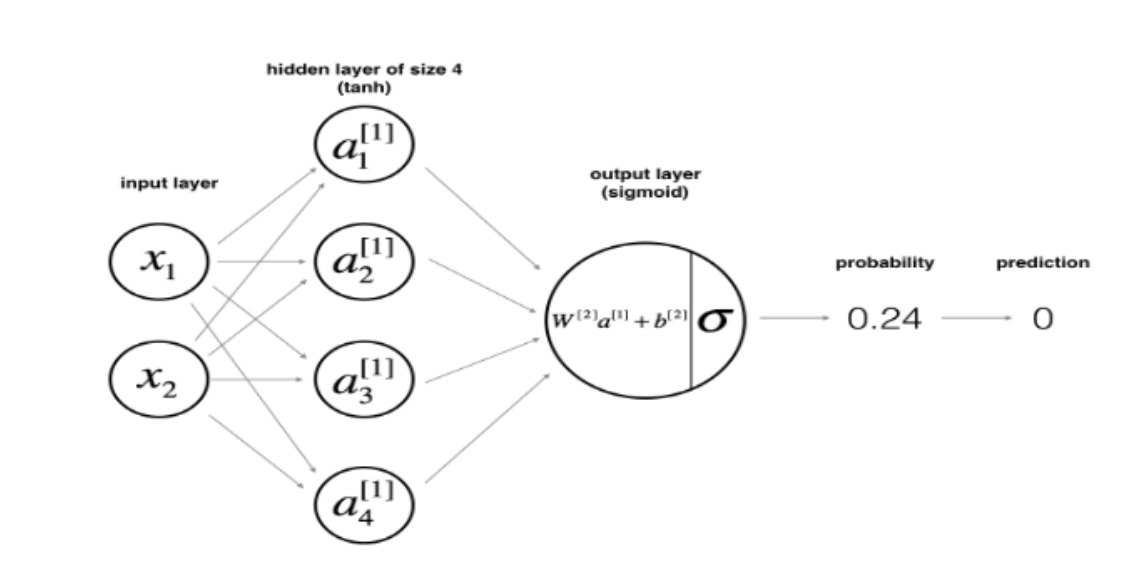

In [21]:
def initialize_parameters(n_x, n_h, n_y):
    """
    功能 ：初始化参数w和b
    
    参数 ：
    n_x -- 输入层神经元个数
    n_h -- 隐藏层神经元个数
    n_y -- 输出层神经元个数
    
    返回值 ：
    parameters -- 由w1, b1, w2, b2 组成的字典
    """
    np.random.seed(2)
    
    #随机初始化第一层（隐藏层）相关参数w
    W1 = np.random.randn(n_h,n_x) * 0.01
    
    #将第一层的参数b赋值为0，因为w已经非0了，b可以为0
    b1 = np.zeros(shape = (n_h, 1))
    
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape = (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

单元测试

In [23]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)

In [24]:
print("nn dim(" + str(n_x) + "," + str(n_h) + "," + str(n_y) + ")");
print("W1 dim:" + str(parameters["W1"].shape))
print("b1 dim:" + str(parameters["b1"].shape))
print("W2 dim:" + str(parameters["W2"].shape))
print("b2 dim:" + str(parameters["b2"].shape))
print("--------------------------------------------")
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

nn dim(2,4,1)
W1 dim:(4, 2)
b1 dim:(4, 1)
W2 dim:(1, 4)
b2 dim:(1, 1)
--------------------------------------------
W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


## 2.前向传播

In [31]:
def forward_propagation(X, parameters):
    """
    功能 ：前向传播
    
    参数 ：
    X -- 输入特征，维度是（2，400）
    parameters -- 由w和b组成的参数字典
    
    返回值 ：
    A2 -- 第二层使用sigmoid激活函数后的值
    cache -- 由Z1, A1, Z2, A2 组成的字典
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

单元测试

In [32]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

In [33]:
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

print("--------------------------------------------")

print("W1 dim:" + str(parameters["W1"].shape))
print("b1 dim:" + str(parameters["b1"].shape))
print("W2 dim:" + str(parameters["W2"].shape))
print("b2 dim:" + str(parameters["b2"].shape))

print("--------------------------------------------")

print("Z1 dim:" + str(cache['Z1'].shape))
print("A1 dim:" + str(cache['A1'].shape))
print("Z2 dim:" + str(cache['Z2'].shape))
print("A2 dim:" + str(cache['A2'].shape))

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431
--------------------------------------------
W1 dim:(4, 2)
b1 dim:(4, 1)
W2 dim:(1, 4)
b2 dim:(1, 1)
--------------------------------------------
Z1 dim:(4, 3)
A1 dim:(4, 3)
Z2 dim:(1, 3)
A2 dim:(1, 3)


## 3.计算成本

In [34]:
def compute_cost(A2, Y):
    """
    功能 ：计算成本
    
    参数 ：
    A2 -- 神经网络最后一层的输出结果
    Y -- 数据的颜色标签，0表示红色，1表示蓝色
    
    返回值 ：
    cost -- 成本
    """
    
    m = Y.shape[1] 
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    return cost

单元测试

In [35]:
A2, Y_assess, _ = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6929198937761266


## 4.反向传播

In [41]:
def backward_propagation(parameters, cache, X, Y):
    """
    功能 ： 计算反向传播
    
    参数 ：
    parameters -- 由w和b组成的字典
    cache -- 由Z1, A1, Z2, A2 组成的字典
    X -- 输入特征，维度是（2，400）
    Y -- 数据的颜色标签，0表示红色，1表示蓝色
    
    返回值 ：
    grads -- 由dW1，db1，dW2，db2组成的字典
    """
    
    m = Y.shape[0]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

单元测试

In [42]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)

In [43]:
print("dW1 dim:" + str(grads["dW1"].shape))
print("db1 dim:" + str(grads["db1"].shape))
print("dW2 dim:" + str(grads["dW2"].shape))
print("db2 dim:" + str(grads["db2"].shape))
print("------------------------------")

print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 dim:(4, 2)
db1 dim:()
dW2 dim:(1, 4)
db2 dim:()
------------------------------
dW1 = [[ 0.03056125 -0.02126104]
 [ 0.02620342 -0.0182304 ]
 [-0.0159254   0.01108138]
 [-0.06619094  0.04605379]]
db1 = 0.0017181797378475793
dW2 = [[ 0.0109084   0.09460812  0.03488741 -0.03954948]]
db2 = 0.19768468062152444


## 5.更新参数

In [44]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    功能 ：更新参数w和b
    
    参数 ：
    parameters -- 由参数W1, b1, W2, b2组成的字典
    grads -- 由参数dW1, db1, dW2, db2组成的字典
    
    返回值 ：
    parameters -- 由更新好的参数W1, b1, W2, b2组成的字典
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # 根据梯度和学习率来更新参数，使其更优
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

单元测试

In [45]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

In [46]:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


# 建模及运行

In [51]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    """
    功能 ： 多神经元的浅层神经网络
    
    参数 ：
    X -- 输入特征数据，x坐标和y坐标
    Y -- 对应数据的标签
    n_h -- 隐藏层的神经元个数
    num_iterations -- 训练次数
    print_cost -- 是否打印出成本
    
    返回值 ：
    parameters -- 由更新好的参数W1, b1, W2, b2组成的字典
    """
    
    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X,parameters)
        
        cost = compute_cost(A2, Y)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print('在训练%i次后，成本是 ：%f'%(i,cost))
            
    return parameters

单元测试

In [53]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)

在训练0次后，成本是 ：0.692584
在训练1000次后，成本是 ：-inf
在训练2000次后，成本是 ：-inf
在训练3000次后，成本是 ：-inf


/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


在训练4000次后，成本是 ：-inf
在训练5000次后，成本是 ：-inf
在训练6000次后，成本是 ：-inf
在训练7000次后，成本是 ：-inf
在训练8000次后，成本是 ：-inf
在训练9000次后，成本是 ：-inf


## 6.预测

In [54]:
def predict(parameters, X):
    """
    功能 ：预测
    
    参数 ：
    parameters -- 由训练好的参数W1, b1, W2, b2组成的字典
    X -- 预测的数据，本例中是x和y坐标
    
    返回值 ：
    predictions -- 预测出来的值，0-1之间的数
    """
    
    #预测其实就是进行一次前向传播
    A2, cache = forward_propagation(X, parameters)
    #对第二层的数据进行四舍五入
    predictions = np.round(A2)
    
    return predictions

单元测试

In [55]:
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)

In [56]:
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


## 7.应用

浅层神经网络已经建立完成，应用到最开始的单神经元网络的问题上--划分红蓝点

In [57]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

在训练0次后，成本是 ：0.693048
在训练1000次后，成本是 ：nan


/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


在训练2000次后，成本是 ：nan
在训练3000次后，成本是 ：nan
在训练4000次后，成本是 ：nan
在训练5000次后，成本是 ：nan
在训练6000次后，成本是 ：nan
在训练7000次后，成本是 ：nan
在训练8000次后，成本是 ：nan
在训练9000次后，成本是 ：nan


In [58]:
predictions = predict(parameters, X)

In [63]:
print ('预测准确率是: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

预测准确率是: 78%


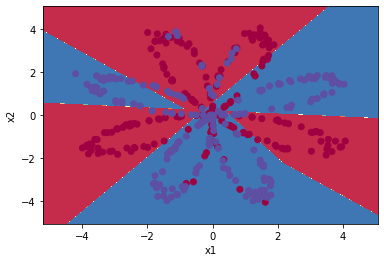

In [64]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())

只用了四个神经元，准确率就大大提升了，下面对比不同神经元对结果对影响

/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


1个隐藏层神经元时的准确度是: 50.0 %
2个隐藏层神经元时的准确度是: 50.0 %
3个隐藏层神经元时的准确度是: 50.0 %
4个隐藏层神经元时的准确度是: 71.25 %
5个隐藏层神经元时的准确度是: 60.0 %
20个隐藏层神经元时的准确度是: 71.75 %
50个隐藏层神经元时的准确度是: 57.99999999999999 %


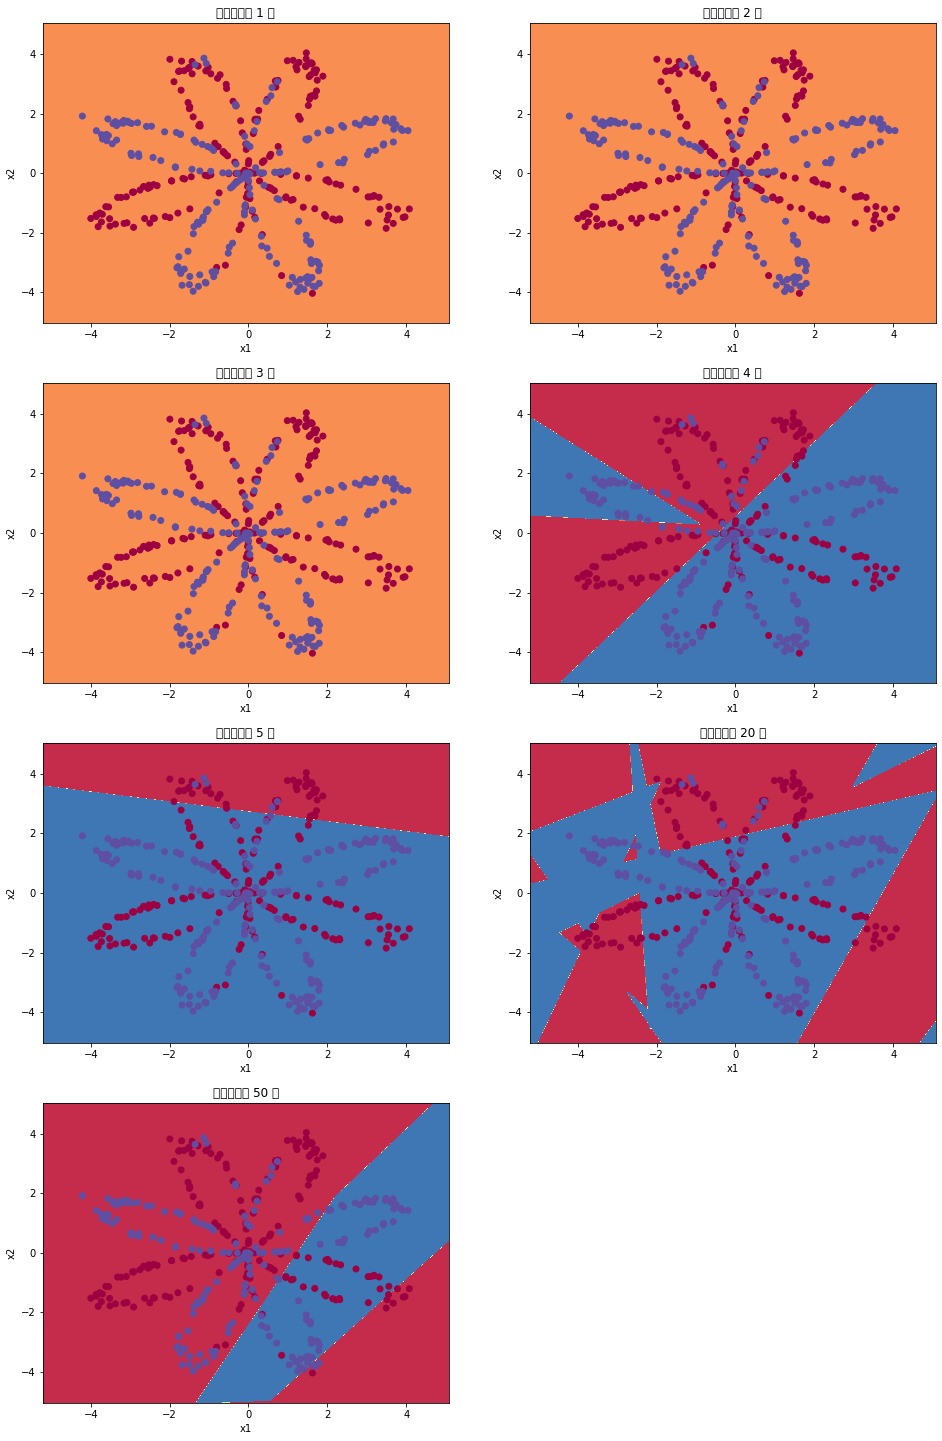

In [66]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50] # 不同的神经元个数
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('神经元个数 %d ：'%n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("{}个隐藏层神经元时的准确度是: {} %".format(n_h, accuracy))